CONVOLUCION

In [7]:
import imageio
import numpy as np
import matplotlib.pyplot as plt

C:\Users\admin\AppData\Local\Temp\ipykernel_4300\3909326219.py:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('fuente.bmp')


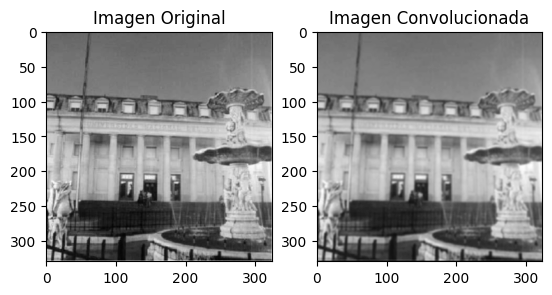

In [8]:
# Kernel de suavizado (promediado)
kernel_suavizado = np.ones((3, 3)) / 9

# Función para convertir de RGB a escala de grises
def rgb_to_grayscale(image):
    # Usar los coeficientes para la conversión a escala de grises
    return np.dot(image[..., :3], [0.299, 0.587, 0.114])

# Cargar la imagen
image = imageio.imread('fuente.bmp')

# Si la imagen tiene 3 canales (RGB), convertir a escala de grises
if len(image.shape) == 3:
    image = rgb_to_grayscale(image)

# Función de convolución
def convolution(image, kernel=np.ones((3, 3))):
    # Tamaños de la imagen y el kernel
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    
    # Padding para mantener el tamaño original de la imagen
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)
    convolved = np.zeros_like(image)
    
    # Aplicar la convolución
    for x in range(image_height):
        for y in range(image_width):
            region = padded_image[x:x + kernel_height, y:y + kernel_width]
            convolved[x, y] = np.sum(region * kernel)
    
    return convolved

# Aplicar la convolución
imagen_convolucionada = convolution(image, kernel_suavizado)

# Mostrar la imagen original y la imagen convolucionada
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagen Original')

plt.subplot(1, 2, 2)
plt.imshow(imagen_convolucionada, cmap='gray')
plt.title('Imagen Convolucionada')

plt.show()

1- Pasabajos: Plano y Bartlett 3x3, 5x5, 7x7. Gaussiano 5x5 y 7x7. 

In [18]:
# Filtros pasabajos
def filtro_plano(size):
    return np.ones((size, size)) / (size * size)

def filtro_bartlett(size):
    bartlett = np.bartlett(size)
    return np.outer(bartlett, bartlett) / bartlett.sum()

def filtro_gaussiano(size, sigma=1):
    ax = np.linspace(-(size - 1) / 2., (size - 1) / 2., size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sigma))
    return kernel / np.sum(kernel)

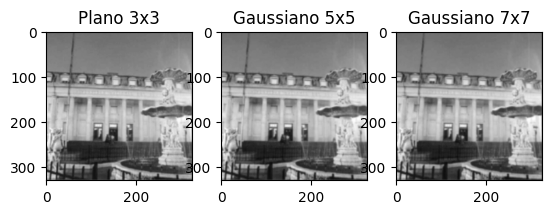

In [23]:
# Aplicar filtros con los tamaños especificados
kernel_plano_3 = filtro_plano(3)
kernel_gaussiano_5 = filtro_gaussiano(5)
kernel_gaussiano_7 = filtro_gaussiano(7)

# Aplicar convoluciones
imagen_plano_3 = convolution(image, kernel_plano_3)
imagen_gaussiano_5 = convolution(image, kernel_gaussiano_5)
imagen_gaussiano_7 = convolution(image, kernel_gaussiano_7)

# Mostrar las imágenes con diferentes filtros
plt.subplot(1, 3, 1)
plt.imshow(imagen_plano_3, cmap='gray')
plt.title('Plano 3x3')

plt.subplot(1, 3, 2)
plt.imshow(imagen_gaussiano_5, cmap='gray')
plt.title('Gaussiano 5x5')

plt.subplot(1, 3, 3)
plt.imshow(imagen_gaussiano_7, cmap='gray')
plt.title('Gaussiano 7x7')

plt.show()

Text(0.5, 1.0, 'Bartlett 7x7')

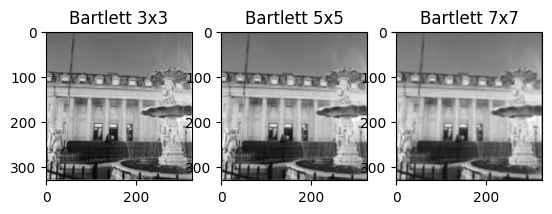

In [24]:
# Aplicar filtros con los tamaños especificados
kernel_bartlett_3 = filtro_bartlett(3)
kernel_bartlett_5 = filtro_bartlett(5)
kernel_bartlett_7 = filtro_bartlett(7)

# Aplicar convoluciones
imagen_bartlett_3 = convolution(image, kernel_bartlett_3)
imagen_bartlett_5 = convolution(image, kernel_bartlett_5)
imagen_bartlett_7 = convolution(image, kernel_bartlett_7)

plt.subplot(1, 3, 1)
plt.imshow(imagen_bartlett_3, cmap='gray')
plt.title('Bartlett 3x3')

plt.subplot(1, 3, 2)
plt.imshow(imagen_bartlett_5, cmap='gray')
plt.title('Bartlett 5x5')

plt.subplot(1, 3, 3)
plt.imshow(imagen_bartlett_7, cmap='gray')
plt.title('Bartlett 7x7')

2- Detectores de bordes: Laplaciano v4 y v8. Sobel las 8 orientaciones. 

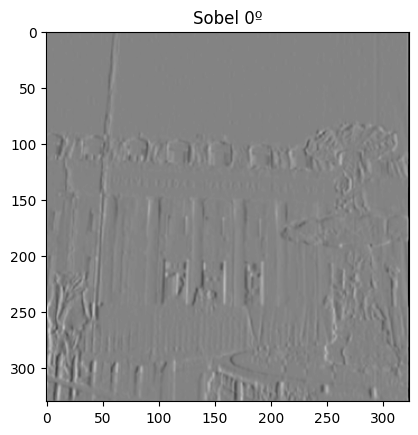

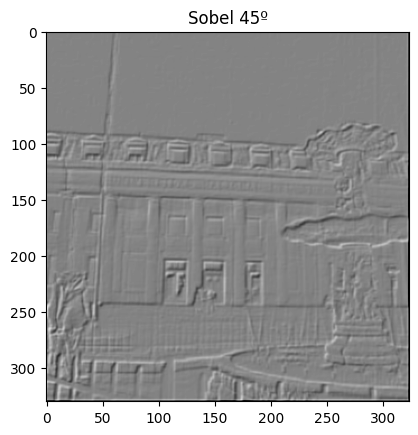

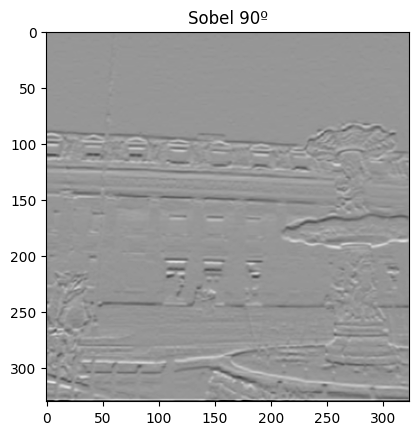

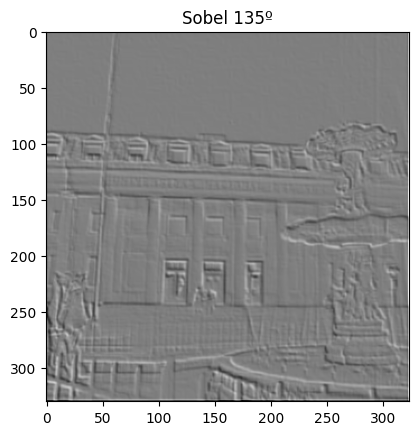

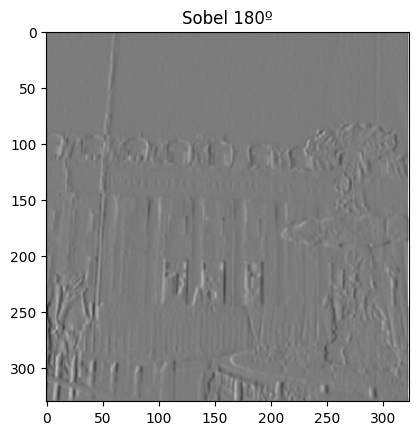

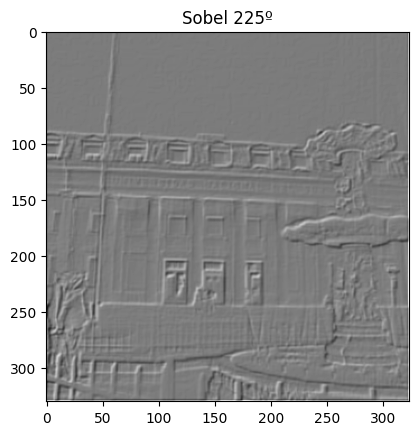

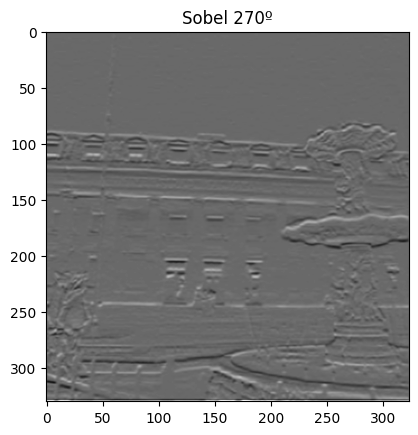

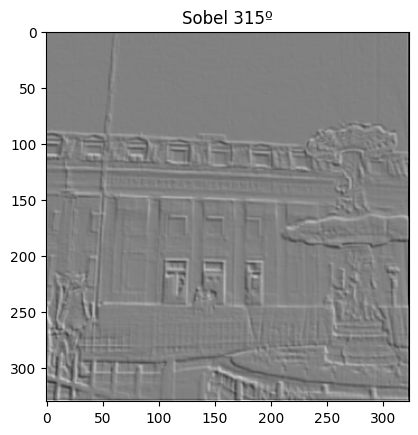

In [25]:
# Kernels de Sobel en 8 orientaciones
sobel_kernels = {
    '0º': np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]),
    '45º': np.array([[-2, -1, 0], [-1, 0, 1], [0, 1, 2]]),
    '90º': np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]),
    '135º': np.array([[0, -1, -2], [1, 0, -1], [2, 1, 0]]),
    '180º': np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]]),
    '225º': np.array([[2, 1, 0], [1, 0, -1], [0, -1, -2]]),
    '270º': np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]]),
    '315º': np.array([[0, 1, 2], [-1, 0, 1], [-2, -1, 0]])
}

# Aplicar Sobel en 8 orientaciones
for direction, kernel in sobel_kernels.items():
    sobel_result = convolution(image, kernel)
    plt.imshow(sobel_result, cmap='gray')
    plt.title(f'Sobel {direction}')
    plt.show()

3- Pasabanda, pasaaltos de frecuencia de corte 0,2 y 0,4.

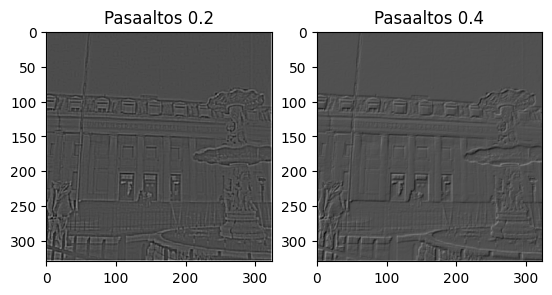

In [26]:
# Filtro pasaaltos con frecuencia de corte
def pasaaltos(image, cutoff):
    kernel_size = int(1 / cutoff)
    kernel = -np.ones((kernel_size, kernel_size))
    kernel[kernel_size//2, kernel_size//2] = kernel_size ** 2 - 1
    
    return convolution(image, kernel)

# Aplicar los filtros pasaaltos con frecuencias 0.2 y 0.4
imagen_pasaaltos_02 = pasaaltos(image, 0.2)
imagen_pasaaltos_04 = pasaaltos(image, 0.4)

plt.subplot(1, 2, 1)
plt.imshow(imagen_pasaaltos_02, cmap='gray')
plt.title('Pasaaltos 0.2')

plt.subplot(1, 2, 2)
plt.imshow(imagen_pasaaltos_04, cmap='gray')
plt.title('Pasaaltos 0.4')

plt.show()